## Group No. 01

## Group Member Names:
1.<br> 
2.<br>
3.<br>
4.<br>

# 1. Import the required libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

# Check TensorFlow version
print("Tensorflow version:", tf.__version__)
print("Tensorflow dataset version:",tfds.__version__)



Tensorflow version: 2.12.0
Tensorflow dataset version: 4.9.2


# 2. Data Acquisition  -- Score: 0.5 Mark
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [12]:
# 2. Data Acquisition
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


## 2.2 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 



Number of training examples: 50000
Number of test examples: 10000
Dataset features: FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


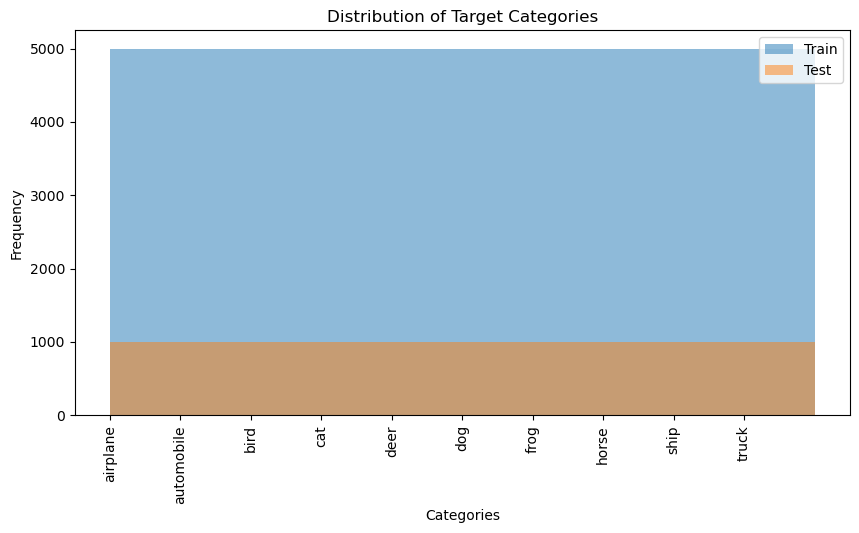

In [13]:
# Size of the dataset
num_train_examples = tf.data.experimental.cardinality(train_dataset).numpy()
num_test_examples = tf.data.experimental.cardinality(test_dataset).numpy()
print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)

# What type of data attributes are there?
dataset_features = dataset_info.features
print("Dataset features:", dataset_features)

# What are you classifying?
classes = dataset_info.features['label'].names
print("Classes:", classes)

# Plot the distribution of the categories of the target/label.
train_labels = [label for _, label in train_dataset]
test_labels = [label for _, label in test_dataset]

plt.figure(figsize=(10, 5))
plt.hist(train_labels, bins=range(len(classes) + 1), alpha=0.5, label='Train')
plt.hist(test_labels, bins=range(len(classes) + 1), alpha=0.5, label='Test')
plt.xticks(range(len(classes)), classes, rotation='vertical')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Target Categories')
plt.legend()
plt.show()


# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

CIFAR-10 dataset does not usually require duplicate removal, missing data imputation, or inconsistency removal, as the dataset is preprocessed and well-maintained. However, encoding, normalization, and feature engineering can be performed. Stop word removal, lemmatization, stemming, and vectorization are generally used in NLP, not applicable to image classification tasks like CIFAR-10.

In [14]:
# 3.1. Data Preparation

# Convert the labels to one-hot encoding
def convert_to_one_hot(image, label):
    label = tf.cast(label, tf.int32)  # convert labels to integer type
    label = tf.one_hot(label, len(classes))
    return image, label

train_dataset = train_dataset.map(convert_to_one_hot)
test_dataset = test_dataset.map(convert_to_one_hot)

# Normalize the images to [0, 1] range.
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

train_dataset =  train_dataset.map(normalize_img)
test_dataset =  test_dataset.map(normalize_img)

# Perform data augmentation (feature engineering)
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Apply data augmentation to the train dataset
def augment_data(image, label):
    image = tf.expand_dims(image, axis=0)
    image = data_augmentation(image, training=True)
    image = tf.squeeze(image, axis=0)
    return image, label

train_dataset = train_dataset.map(augment_data)


#This code converts the labels to one-hot encoding, normalizes the image data to the range [0, 1], applies random flips, rotations, and zooms to the training data for data augmentation (a kind of feature engineering in image processing), and then sets up the datasets for efficient loading.


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





dataset has already been separated into features and labels (images and corresponding classes). Also, one-hot encoding has been applied to the labels in the previous data preparation section. Therefore, the tasks outlined in section 3.2 have already been completed.
Thus, we already have the dataset in the form of (X,y) or (Features, Labels).

In [15]:
# Separate the data from the target
def separate_data(image, label):
    X = image
    y = label
    return X, y

train_dataset = train_dataset.map(separate_data)
test_dataset = test_dataset.map(separate_data)


## 3.3 Split the data into training set and testing set

 dataset has already been divided into training and testing sets at the time of data acquisition using tfds.load function. However, we can create a validation set from the training data with the take and skip functions.

In [18]:
# Decide on the number of validation samples you want
num_validation_samples = int(0.1 * num_train_examples)  # 10% of training set

# Create the validation dataset
val_dataset = train_dataset.take(num_validation_samples)
train_dataset = train_dataset.skip(num_validation_samples)

# Determine the number of validation and training examples
num_val_examples = tf.data.experimental.cardinality(val_dataset).numpy()
num_train_examples = tf.data.experimental.cardinality(train_dataset).numpy()

print("Number of training examples:", num_train_examples)
print("Number of validation examples:", num_val_examples)


Number of training examples: 28800
Number of validation examples: 3200


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


**Solution**<br>
From the preprocessing steps we've taken so far, it's clear that the CIFAR-10 dataset does not contain any missing values or duplicates, as these are not issues generally associated with this dataset. Additionally, since this is an image dataset, techniques like stop word removal, lemmatization, stemming, and vectorization, which are usually applicable to text data, are not relevant in this context.

In the preprocessing, we have:

**Converted the labels to one-hot encoding:** This is necessary for the network to properly understand the class labels, since the labels are categorical and not continuous. It helps the model better capture the differences between different classes.

**Normalized the image data:** we divided the pixel values by 255.0, bringing them into the range [0, 1]. This is a common preprocessing step for neural networks, which perform better when input data are small and homogeneously distributed.

**Applied data augmentation:** Random flips, rotations, and zooms were applied to the training images to increase the diversity of the training data and help the model generalize better.

**Separated data and labels:** Separated the images (features) and the labels (targets) for both training and testing datasets.

**Created a validation set:** we split the initial training set to create a validation set, which can be used to monitor the model's performance on unseen data during training.

In [21]:
##---------Type the answer below this line------------------##
print(f'Training dataset size: {num_train_examples}')
print(f'Validation dataset size: {num_val_examples}')
print(f'Testing dataset size: {num_test_examples}')


Training dataset size: 28800
Validation dataset size: 3200
Testing dataset size: 10000


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [ ]:
##---------Type the code below this line------------------##

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [ ]:
##---------Type the answer below this line------------------##

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
##---------Type the code below this line------------------##

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [ ]:
##---------Type the code below this line------------------##

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [ ]:
##---------Type the answers below this line------------------##

# 6. Test the model - 0.5 marks


In [ ]:
##---------Type the code below this line------------------##

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
##---------Type the code below this line------------------##

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck